In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_pickle('fits/cluster_results_noise.pkl')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
df

,method,repeat,centroids,nmi,label,noise,centroids_weights
0,kmeans,0,"[[-0.7036567032929613, 0.3038915743004778, 0.3...",0.000185,"[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0,...",0,NaN
0,kmeans,1,"[[-0.7036567032929613, 0.3038915743004778, 0.3...",0.000185,"[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0,...",0,NaN
0,kmeans,2,"[[0.7038814288868118, -0.395922599948849, -0.3...",0.000185,"[[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0,...",0,NaN
0,kmeans,3,"[[0.7038814288868118, -0.395922599948849, -0.3...",0.000185,"[[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0,...",0,NaN
0,kmeans,4,"[[0.020199182322835803, 0.3015750867070866, -0...",0.000566,"[[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0,...",0,NaN
...,...,...,...,...,...,...,...
0,SingularWishart_fullrank,0,"[[[0.5000000000000003, -0.11247767835626626, -...",0.006921,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",15,NaN
0,SingularWishart_fullrank,1,"[[[0.49999999999999956, -0.49050160564324363, ...",0.018476,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",15,NaN
0,SingularWishart_fullrank,2,"[[[0.5000000000000003, -0.11247721977741483, -...",0.006921,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",15,NaN
0,SingularWishart_fullrank,3,"[[[0.49999999999999983, -0.09630218777321815, ...",0.006921,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",15,NaN


In [27]:
#Rename method kmeans to "Least squares K-means (sign-flipped eigenvectors)"
df['method'] = df['method'].replace('kmeans', 'Least squares K-means (sign-flipped eigenvectors)')
df['method'] = df['method'].replace('diametrical', 'Diametrical clustering')
df['method'] = df['method'].replace('grassmann', 'Grassmann clustering')
df['method'] = df['method'].replace('weighted_grassmann', 'Weighted Grassmann clustering')
df['method'] = df['method'].replace('Watson', 'Watson mixture')
df['method'] = df['method'].replace('ACG_fullrank', 'Angular central Gaussian mixture')
df['method'] = df['method'].replace('MACG_fullrank', 'Matrix angular central Gaussian mixture')
df['method'] = df['method'].replace('SingularWishart_fullrank', 'Singular Wishart mixture')

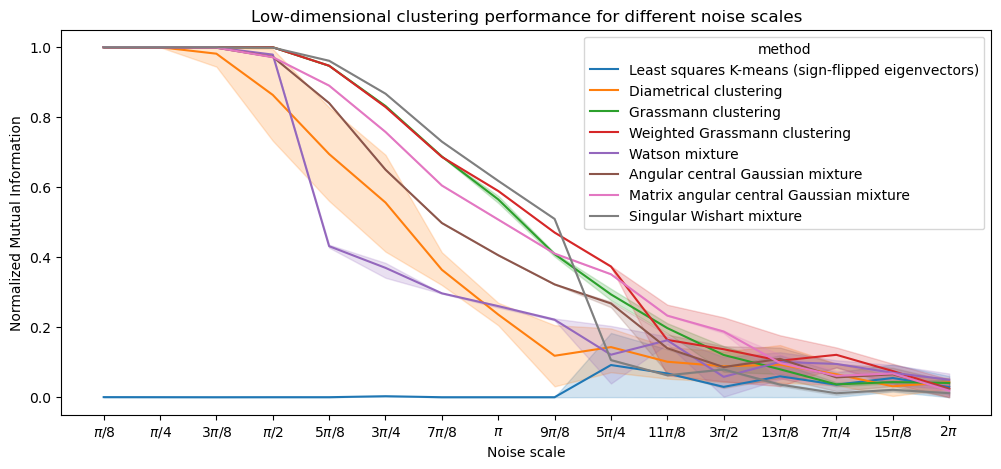

In [34]:
# make a lineplot for each of the unique methods in the column "method". the y-axis value should be the column "nmi". the x-axis should correspond to the column "noise", only the x-axis labels should actually correspond to [pi/4,pi/2,3pi/4,...,2pi]

plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='noise', y='nmi', hue='method')
plt.xticks(range(16), labels=[r'$\pi/8$',r'$\pi/4$',r'$3\pi/8$',r'$\pi/2$',r'$5\pi/8$',r'$3\pi/4$',r'$7\pi/8$',r'$\pi$',
                              r'$9\pi/8$',r'$5\pi/4$',r'$11\pi/8$',r'$3\pi/2$',r'$13\pi/8$',r'$7\pi/4$',r'$15\pi/8$',r'$2\pi$'])#
# plt.xlim(0,3)
plt.ylabel('Normalized Mutual Information')
plt.xlabel('Noise scale')
plt.title('Low-dimensional clustering performance for different noise scales')
plt.savefig('figs/cluster_results_noise.png', bbox_inches='tight', dpi=300)